# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
    # Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#building query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f'{url}&appid={api_key}&units={units}&q='

In [4]:
#creating lists with city weather data
temperature = []
humidity = []
cloudiness = []
wind_speed = []
city_list = []
lat_list = []
lng_list = []
country_list = []
count = 0

for city in cities:
    
    count += 1
    print(f'City number: {count}. City name: {city}')
    
    try:
        response = requests.get(query_url + city).json()
        temperature.append((response['main']['temp']))
        humidity.append((response['main']['humidity']))
        cloudiness.append((response['clouds']['all']))
        wind_speed.append((response['wind']['speed']))
        lat_list.append((response['coord']['lat']))
        lng_list.append((response['coord']['lon']))
        city_list.append(city)
        country_list.append(response['sys']['country'])
        
    except:
        print('City not found.')
        
    time.sleep(1)

City number: 1. City name: cabo san lucas
City number: 2. City name: airai
City number: 3. City name: upernavik
City number: 4. City name: marcona
City not found.
City number: 5. City name: punta arenas
City number: 6. City name: qaanaaq
City number: 7. City name: jamestown
City number: 8. City name: bengkulu
City number: 9. City name: albany
City number: 10. City name: new norfolk
City number: 11. City name: vaini
City number: 12. City name: paamiut
City number: 13. City name: nanortalik
City number: 14. City name: fairbanks
City number: 15. City name: taolanaro
City not found.
City number: 16. City name: madang
City number: 17. City name: avarua
City number: 18. City name: arraial do cabo
City number: 19. City name: great falls
City number: 20. City name: pucallpa
City number: 21. City name: kodiak
City number: 22. City name: chuy
City number: 23. City name: atuona
City number: 24. City name: bredasdorp
City number: 25. City name: aklavik
City number: 26. City name: mataura
City numb

City number: 208. City name: caravelas
City number: 209. City name: castro
City number: 210. City name: buchanan
City number: 211. City name: marienburg
City number: 212. City name: tagab
City number: 213. City name: dunmore town
City number: 214. City name: phan rang
City not found.
City number: 215. City name: westport
City number: 216. City name: sao jose da coroa grande
City number: 217. City name: ponta do sol
City number: 218. City name: forio
City number: 219. City name: thompson
City number: 220. City name: yaan
City number: 221. City name: komsomolskiy
City number: 222. City name: salalah
City number: 223. City name: valley
City number: 224. City name: ambulu
City number: 225. City name: saint-francois
City number: 226. City name: matara
City number: 227. City name: sambava
City number: 228. City name: catamarca
City number: 229. City name: otoka
City number: 230. City name: alugan
City number: 231. City name: tiarei
City number: 232. City name: norman wells
City number: 233. 

City number: 415. City name: maniitsoq
City number: 416. City name: bethanien
City number: 417. City name: port-gentil
City number: 418. City name: karratha
City number: 419. City name: fortuna
City number: 420. City name: nigel
City number: 421. City name: lavrentiya
City number: 422. City name: ailigandi
City number: 423. City name: novyy urengoy
City number: 424. City name: gourcy
City number: 425. City name: flin flon
City number: 426. City name: nelson bay
City number: 427. City name: svetlyy
City number: 428. City name: sorvag
City not found.
City number: 429. City name: umm kaddadah
City number: 430. City name: vao
City number: 431. City name: talnakh
City number: 432. City name: sergeyevka
City number: 433. City name: natchitoches
City number: 434. City name: sorland
City number: 435. City name: rorvik
City number: 436. City name: poronaysk
City number: 437. City name: meyungs
City not found.
City number: 438. City name: kilindoni
City number: 439. City name: padang
City number

City number: 624. City name: tilichiki
City number: 625. City name: beeville
City number: 626. City name: rabo de peixe
City number: 627. City name: guerrero negro
City number: 628. City name: eskil
City number: 629. City name: lang son
City number: 630. City name: laurel
City number: 631. City name: forest lake
City number: 632. City name: burica
City not found.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#create df from city weather query results
weather_dict = {"City": city_list,
               "Temperature": temperature,
               "%Humidity": humidity,
               "Cloudiness":cloudiness,
               "Wind Speed": wind_speed,
               "Latitude": lat_list,
               "Longitude": lng_list,
               "Country": country_list}

weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Temperature,%Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Country
0,cabo san lucas,32.70,64,18,3.55,22.8909,-109.9124,MX
1,airai,10.65,80,76,1.72,-8.9266,125.4092,TL
2,upernavik,6.14,69,100,2.57,72.7868,-56.1549,GL
3,punta arenas,6.90,81,75,12.86,-53.1500,-70.9167,CL
4,qaanaaq,5.12,68,11,1.32,77.4840,-69.3632,GL
...,...,...,...,...,...,...,...,...
569,guerrero negro,26.23,55,21,6.23,27.9769,-114.0611,MX
570,eskil,24.19,22,0,4.44,38.4017,33.4131,TR
571,lang son,23.16,92,100,1.30,21.8333,106.7333,VN
572,laurel,32.47,63,75,3.60,39.0993,-76.8483,US


In [7]:
#export city data to csv
weather_data.to_csv('weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#there are no cities in this df with humidity > 100%
weather_data.loc[weather_data['%Humidity'] > 100]

,City,Temperature,%Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Country


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [9]:
weather_data.head()

,City,Temperature,%Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Country
0,cabo san lucas,32.70,64,18,3.55,22.8909,-109.9124,MX
1,airai,10.65,80,76,1.72,-8.9266,125.4092,TL
2,upernavik,6.14,69,100,2.57,72.7868,-56.1549,GL
3,punta arenas,6.90,81,75,12.86,-53.1500,-70.9167,CL
4,qaanaaq,5.12,68,11,1.32,77.4840,-69.3632,GL


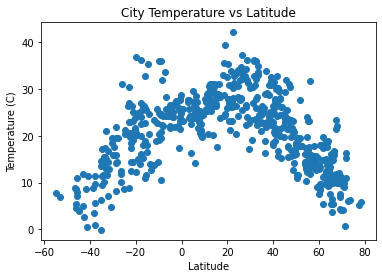

In [10]:
plt.scatter(weather_data['Latitude'], weather_data['Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('City Temperature vs Latitude')

plt.show()

Explanation: This code is analyzing the relationship between temperature and latitude for the queried cities.

## Latitude vs. Humidity Plot

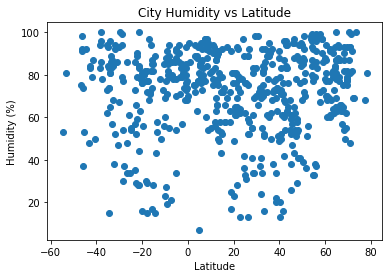

In [11]:
plt.scatter(weather_data['Latitude'], weather_data['%Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Humidity vs Latitude')

plt.show()

Explanation: This code is analyzing the relationship between humidity and latitude for the queried cities.

## Latitude vs. Cloudiness Plot

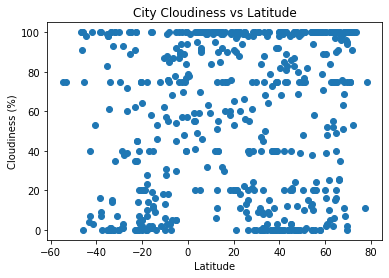

In [12]:
plt.scatter(weather_data['Latitude'], weather_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Cloudiness vs Latitude')

plt.show()

Explanation: This code is analyzing the relationship between cloudiness and latitude for the queried cities.

## Latitude vs. Wind Speed Plot

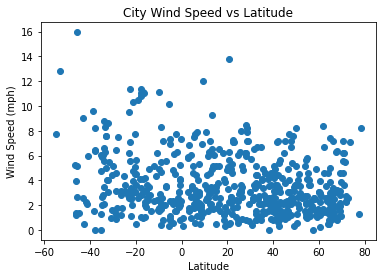

In [13]:
plt.scatter(weather_data['Latitude'], weather_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Wind Speed vs Latitude')

plt.show()

Explanation: This code is analyzing the relationship between wind speed and latitude for the queried cities.

## Linear Regression

In [14]:
#Creating dataframes for each hemisphere
north_data = weather_data.loc[weather_data['Latitude'] > 0]
south_data = weather_data.loc[weather_data['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

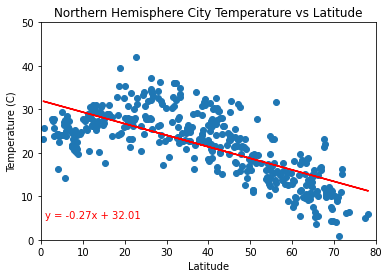

 rsquared = 0.5


In [15]:
plt.scatter(north_data['Latitude'], north_data['Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('Northern Hemisphere City Temperature vs Latitude')


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_data['Latitude'], north_data['Temperature'])
regress_values = north_data['Latitude'] * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept, 2)}'

plt.plot(north_data['Latitude'], regress_values, color='red')
plt.annotate(line_eq,(1,5), color='red', fontsize=10)

plt.xlim(0, 80)
plt.ylim(0, 50)

plt.show()
print(f' rsquared = {round(rvalue * rvalue,2)}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

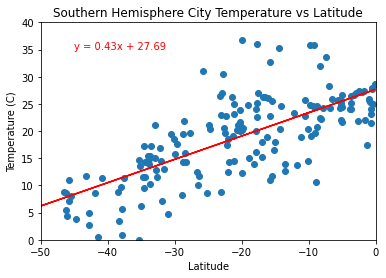

 rsquared = 0.54


In [16]:
plt.scatter(south_data['Latitude'], south_data['Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('Southern Hemisphere City Temperature vs Latitude')


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_data['Latitude'], south_data['Temperature'])
regress_values = south_data['Latitude'] * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept, 2)}'

plt.plot(south_data['Latitude'], regress_values, color='red')
plt.annotate(line_eq,(-45,35), color='red', fontsize=10)

plt.xlim(-50, 0)
plt.ylim(0, 40)

plt.show()
print(f' rsquared = {round(rvalue * rvalue,2)}')

The linear regressions are modeling the dependence of temperature on latitude for both the Northern and Southern Hemisphere. The plots show that in the North Hemisphere, temperature decreases as latitude increases. In the Southern Hemisphere, temperature increases as latitude increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

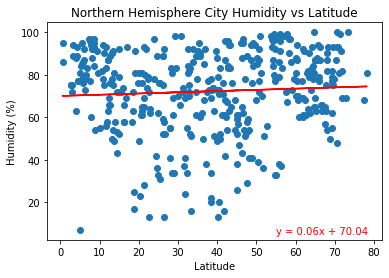

 rsquared = 0.0


In [17]:
plt.scatter(north_data['Latitude'], north_data['%Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere City Humidity vs Latitude')


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_data['Latitude'], north_data['%Humidity'])
regress_values = north_data['Latitude'] * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept, 2)}'

plt.plot(north_data['Latitude'], regress_values, color='red')
plt.annotate(line_eq,(55,5), color='red', fontsize=10)

plt.show()
print(f' rsquared = {round(rvalue * rvalue,2)}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

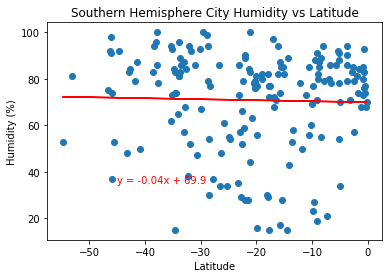

 rsquared = 0.0


In [18]:
plt.scatter(south_data['Latitude'], south_data['%Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere City Humidity vs Latitude')


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_data['Latitude'], south_data['%Humidity'])
regress_values = south_data['Latitude'] * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept, 2)}'

plt.plot(south_data['Latitude'], regress_values, color='red')
plt.annotate(line_eq,(-45,35), color='red', fontsize=10)

plt.show()
print(f' rsquared = {round(rvalue * rvalue,2)}')

The linear regressions are modeling the dependence of humidity on latitude for both the Northern and Southern Hemispheres. The low r squared values provide evidence supporting the claim that humidity is not dependent on latitude for either hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

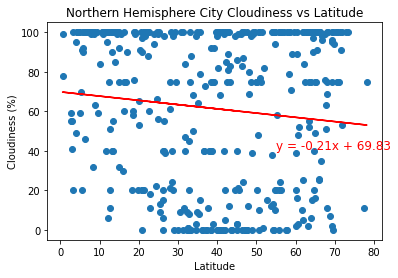

 rsquared = 0.01


In [19]:
plt.scatter(north_data['Latitude'], north_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere City Cloudiness vs Latitude')


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_data['Latitude'], north_data['Cloudiness'])
regress_values = north_data['Latitude'] * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept, 2)}'

plt.plot(north_data['Latitude'], regress_values, color='red')
plt.annotate(line_eq,(55,41), color='red', fontsize=12)

plt.show()
print(f' rsquared = {round(rvalue * rvalue,2)}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

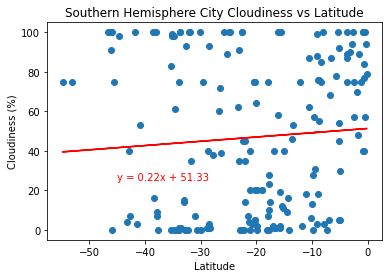

 rsquared = 0.01


In [20]:
plt.scatter(south_data['Latitude'], south_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere City Cloudiness vs Latitude')


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_data['Latitude'], south_data['Cloudiness'])
regress_values = south_data['Latitude'] * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept, 2)}'

plt.plot(south_data['Latitude'], regress_values, color='red')
plt.annotate(line_eq,(-45,25
                     ), color='red', fontsize=10)

plt.show()
print(f' rsquared = {round(rvalue * rvalue,2)}')

The linear regressions are modeling the dependence of cloudiness on latitude for both the Northern and Southern Hemispheres. The low r squared values provide evidence supporting the claim that cloudiness is not dependent on latitude for either hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

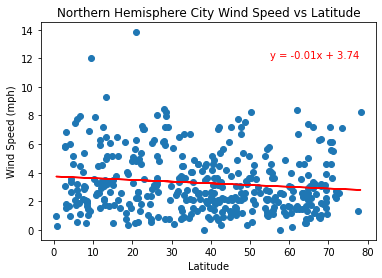

 rsquared = 0.01


In [21]:
plt.scatter(north_data['Latitude'], north_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere City Wind Speed vs Latitude')


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_data['Latitude'], north_data['Wind Speed'])
regress_values = north_data['Latitude'] * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept, 2)}'

plt.plot(north_data['Latitude'], regress_values, color='red')
plt.annotate(line_eq,(55,12), color='red', fontsize=10)

plt.show()
print(f' rsquared = {round(rvalue * rvalue,2)}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

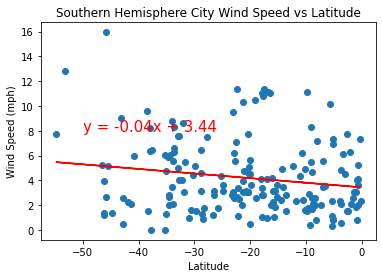

 rsquared = 0.03


In [22]:
plt.scatter(south_data['Latitude'], south_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere City Wind Speed vs Latitude')


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_data['Latitude'], south_data['Wind Speed'])
regress_values = south_data['Latitude'] * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept, 2)}'

plt.plot(south_data['Latitude'], regress_values, color='red')
plt.annotate(line_eq,(-50,8), color='red', fontsize=15)

plt.show()
print(f' rsquared = {round(rvalue * rvalue,2)}')

The linear regressions are modeling the dependence of wind speed on latitude for both the Northern and Southern Hemispheres. The low r squared values provide evidence supporting the claim that wind speed is not dependent on latitude for either hemisphere.